# Finding the best software education market to invest

We are asked to examine a new coders survey to decide the best area to create a new content, together with the country of entry. We are going to use 2017 FCC New Coders Survey. There is no glossary for the data, though we are going to use some of the self-explanatory columns only. In the end, we are going to make some suggestions for the employer to create an education content for a specific area at a specific country or countries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.columns)

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)


__JobRoleInterest__ column includes surveyors most interested job positions.

In [6]:
df.JobRoleInterest.value_counts()

Full-Stack Web Developer                                                                                                                                                    823
  Front-End Web Developer                                                                                                                                                   450
  Data Scientist                                                                                                                                                            152
Back-End Web Developer                                                                                                                                                      142
  Mobile Developer                                                                                                                                                          117
Game Developer                                                                                                          

There are considerable amount of people who are interested in more than one topic. It's wise to gather up using the keywords "Web" and "Mobile".

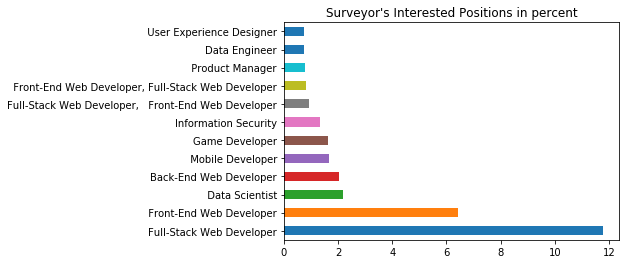

In [7]:
total_surveyors = df.JobRoleInterest.notnull().sum()
bar_ = df.JobRoleInterest.value_counts()[:12] /(df.JobRoleInterest.notnull().sum())*100
bar_.plot.barh(title="Surveyor's Interested Positions in percent")

A percentage that gives the ratio of surveyors who are interested in either "web" or "mobile" might make more sense

In [8]:
def web_or_mobile(string):
    if ("web" in str(string).lower()) or ("mobile" in str(string).lower()):
        return True
    else:
        return False

In [9]:
df["web_or_mobile"] = df["JobRoleInterest"].dropna().apply(web_or_mobile)

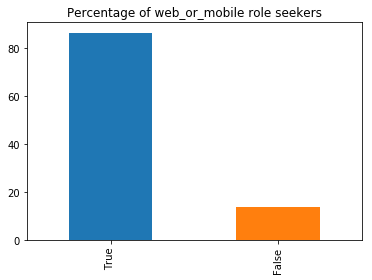

In [10]:
bar_ = df["web_or_mobile"].value_counts()/len(df["web_or_mobile"].dropna())*100
bar_.plot.bar(title = "Percentage of web_or_mobile role seekers")

It seems that more than 85 percent of new coders seek for an either web or mobile related job.

In [11]:
df_interest = df[df["web_or_mobile"].notnull()]

We created a new dataframe that includes only those who are interested in web or mobile position.

In [12]:
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 1 to 18174
Columns: 137 entries, Age to web_or_mobile
dtypes: float64(105), object(32)
memory usage: 7.4+ MB


In [13]:
# Among those who are interested in mobile or web, country breakdown
df_interest["CountryLive"].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Argentina   

According to the list above USA, India, UK and Canada are the four countries with the most willing-to-learn new coders. However, we should have a glance on their willing-to-pay as well. 

In [14]:
cond1 = df.CountryLive == "United States of America"
cond2 = df.CountryLive == "India"
cond3 = df.CountryLive == "United Kingdom"
cond4 = df.CountryLive == "Canada"

df_interest = df_interest[cond1 | cond2 | cond3 | cond4]
df_interest.CountryLive.unique()


C:\Users\Nil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array(['United States of America', 'United Kingdom', 'India', 'Canada'],
      dtype=object)

### Data cleaning

In [15]:
df_interest.MonthsProgramming.isnull().sum()

179

In [16]:
df_interest["MonthsProgramming"].describe()

count    4049.000000
mean       13.880464
std        31.560783
min         0.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       744.000000
Name: MonthsProgramming, dtype: float64

In [17]:
df_interest=df_interest[df_interest["MonthsProgramming"].notnull()]

In [18]:
df_interest.MonthsProgramming.isnull().sum()

0

In [19]:
df_interest.MoneyForLearning.isnull().sum()

134

In [20]:
df_interest=df_interest[df_interest["MoneyForLearning"].notnull()]

In [21]:
df_interest.MoneyForLearning.isnull().sum()

0

In [22]:
def clean_0(num):
    if num == 0:
        return 1
    else:
        return num
    
df_interest["MonthsProgramming"] =df_interest["MonthsProgramming"].apply(clean_0)

In [23]:
df_interest["MonthsProgramming"].describe()

count    3915.000000
mean       13.757854
std        30.842051
min         1.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       744.000000
Name: MonthsProgramming, dtype: float64

In [24]:
df_interest["MoneyForLearning"].describe()

count      3915.000000
mean       1113.450064
std        5802.376390
min           0.000000
25%           0.000000
50%          20.000000
75%         250.000000
max      200000.000000
Name: MoneyForLearning, dtype: float64

Examine the willingness of paying money to learn new stuff

In [25]:
df_interest["paid_monthly"]=df_interest["MoneyForLearning"]/df_interest["MonthsProgramming"]

In [27]:
df_interest.groupby("CountryLive").mean()["paid_monthly"]

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: paid_monthly, dtype: float64

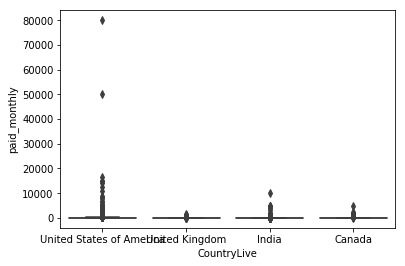

In [28]:
sns.boxplot(x="CountryLive", y="paid_monthly", data=df_interest, whis=5)

In [29]:
df_interest = df_interest[df_interest["paid_monthly"]<3000]

Deciding that more than \$3000 per month does not make sense:

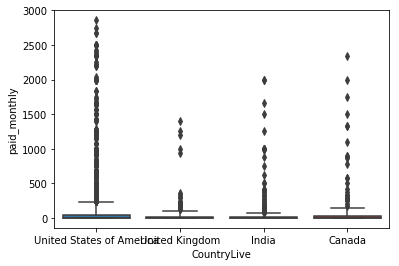

In [30]:
sns.boxplot(x="CountryLive", y="paid_monthly", data=df_interest, whis=5)

In [32]:
df_interest.groupby("CountryLive").mean()["paid_monthly"]

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    106.521992
Name: paid_monthly, dtype: float64

Due to the table above, I recommend to create a content on web and mobile software developing in Canada and United States. Taking into account the high level of population, India can olsa be get into the picture. However, UK is the least attractive market.